Columns in dataset: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

📌 Model: Logistic Regression
Accuracy: 0.9955409118637297
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



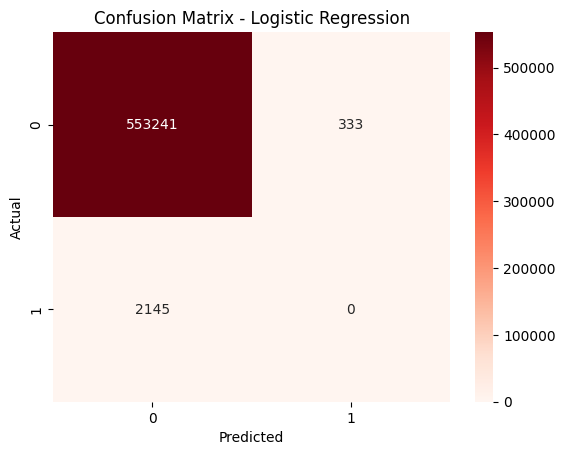


📌 Model: Decision Tree
Accuracy: 0.9961923202193914
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.51      0.58      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.79      0.77    555719
weighted avg       1.00      1.00      1.00    555719



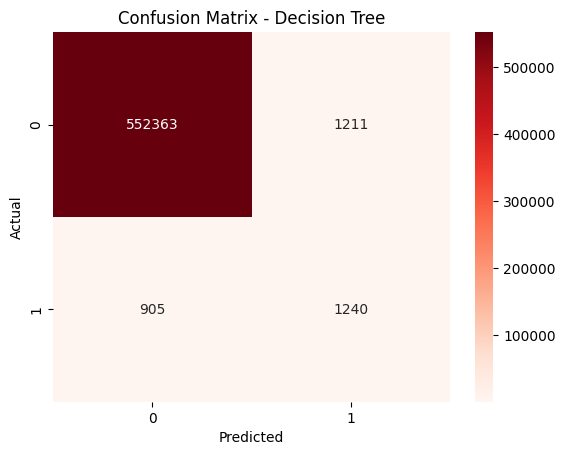


📌 Model: Random Forest
Accuracy: 0.9975635168133535
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.76      0.54      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.77      0.81    555719
weighted avg       1.00      1.00      1.00    555719



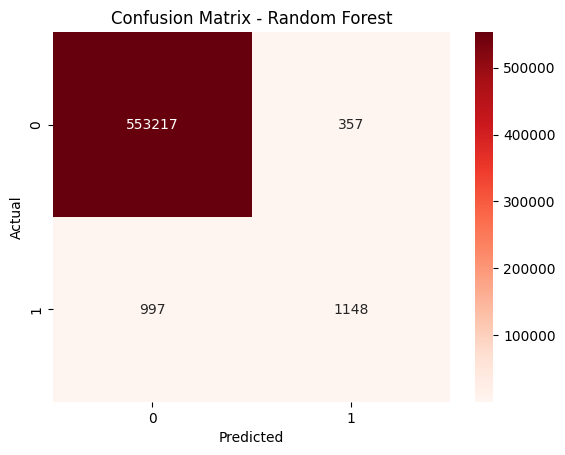

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

# Combine to ensure consistent preprocessing
full_df = pd.concat([train_df, test_df], axis=0)

# Inspect columns
print("Columns in dataset:", full_df.columns)

# Drop columns that shouldn't be used (like IDs or timestamps)
drop_cols = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'dob', 'unix_time', 'merchant', 'trans_num', 'street', 'city', 'state', 'zip', 'job']
for col in drop_cols:
    if col in full_df.columns:
        full_df = full_df.drop(columns=col)

# Convert categorical columns to dummy variables
full_df = pd.get_dummies(full_df, drop_first=True)

# Separate back into train and test
train_size = train_df.shape[0]
train_data = full_df.iloc[:train_size]
test_data = full_df.iloc[train_size:]

# Separate features and target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

# Normalize features (helps Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n📌 Model: {name}")

    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:")
    print(classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
